In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import xmitgcm

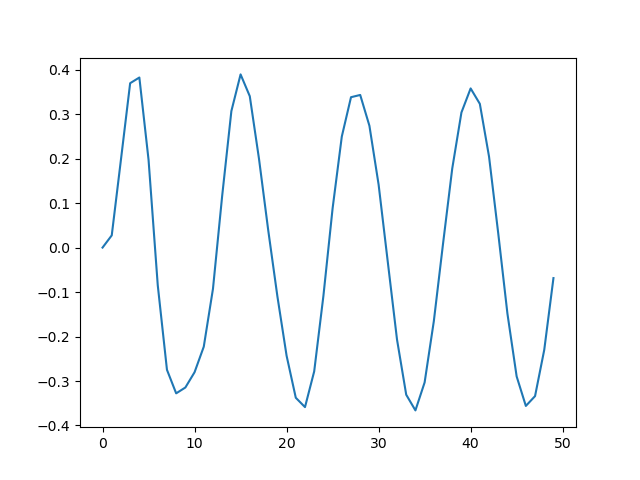

In [2]:
fig, axs = plt.subplots()
runname = 'Fjord4'
with xmitgcm.open_mdsdataset(f'../results/{runname}/input/',
                             endian='<', prefix=['spinup', 'spinup2d']) as ds0:
    axs.plot(ds0.time.astype('float')/1e9/3600, ds0.isel(YC=0).sel(XC=20e3, method='nearest').ETAN)
                                     

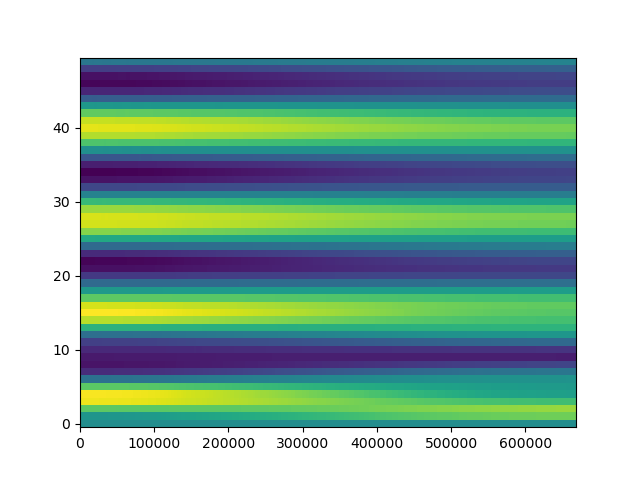

In [3]:
fig, axs = plt.subplots()
runname = 'Fjord4'
with xmitgcm.open_mdsdataset(f'../results/{runname}/input/',
                             endian='<', prefix=['spinup', 'spinup2d']) as ds0:
    axs.pcolormesh(ds0.XC, ds0.time.astype('float')/1e9/3600, ds0.isel(YC=0).ETAN)
                                     

In [7]:
ds0

<xarray.Dataset>
Dimensions:  (XC: 1200, YC: 1, XG: 1200, YG: 1, Z: 20, Zp1: 21, Zu: 20, Zl: 20)
Coordinates: (12/27)
  * XC       (XC) float64 50.0 150.0 250.0 ... 6.339e+05 6.473e+05 6.611e+05
  * YC       (YC) float64 50.0
  * XG       (XG) float64 1.819e-12 100.0 200.0 ... 6.405e+05 6.542e+05
  * YG       (YG) float64 0.0
  * Z        (Z) float64 -12.5 -37.5 -62.5 -87.5 ... -414.0 -440.9 -468.7 -497.2
  * Zp1      (Zp1) float64 0.0 -25.0 -50.0 -75.0 ... -427.3 -454.6 -482.7 -511.7
    ...       ...
    hFacC    (Z, YC, XC) float64 dask.array<chunksize=(20, 1, 1200), meta=np.ndarray>
    hFacW    (Z, YC, XG) float64 dask.array<chunksize=(20, 1, 1200), meta=np.ndarray>
    hFacS    (Z, YG, XC) float64 dask.array<chunksize=(20, 1, 1200), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(20, 1, 1200), meta=np.ndarray>
    maskW    (Z, YC, XG) bool dask.array<chunksize=(20, 1, 1200), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(20, 1, 1200), meta=np.ndarray>
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='../results/Fj...

/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_37840/3533561345.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots()


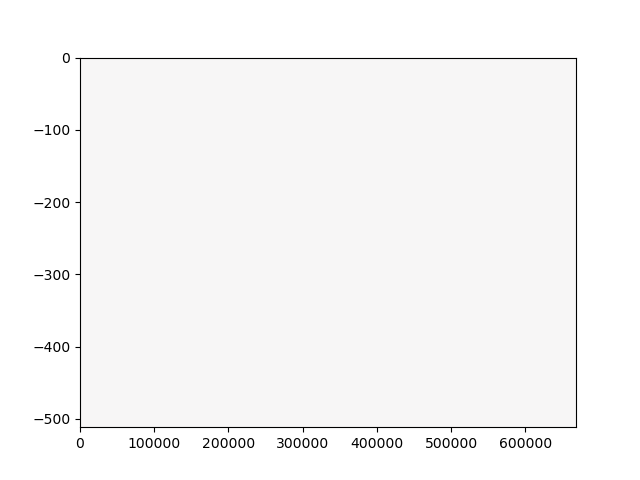

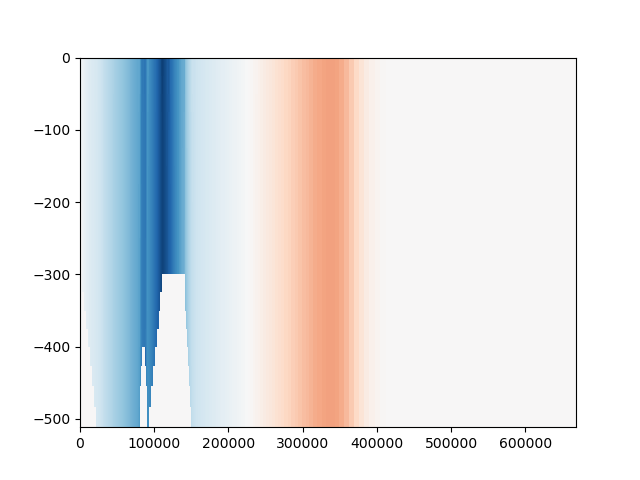

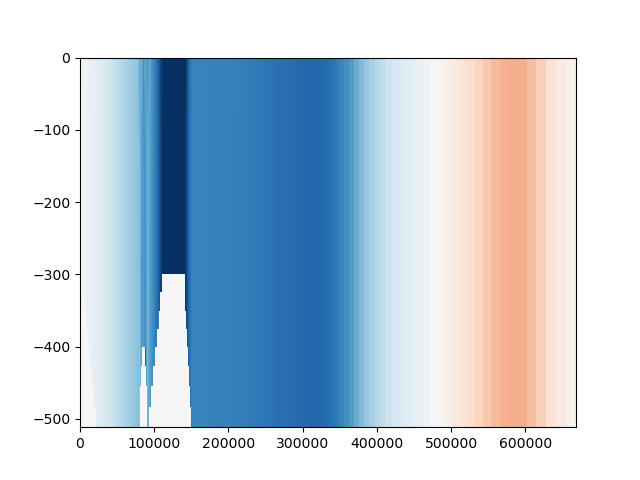

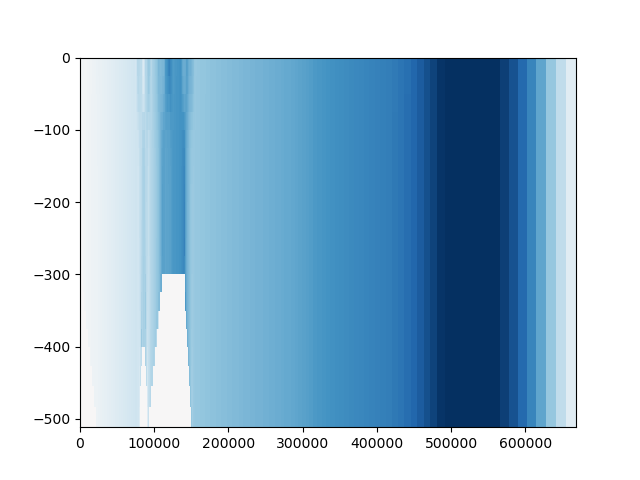

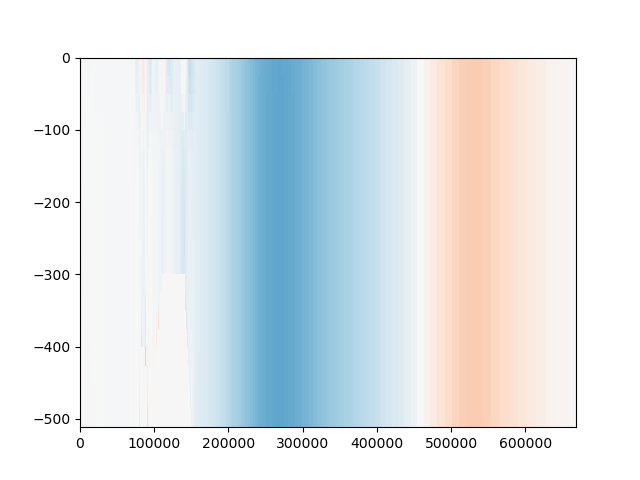

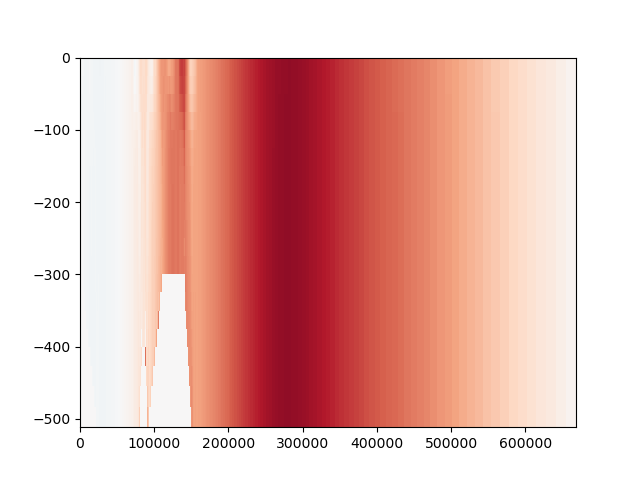

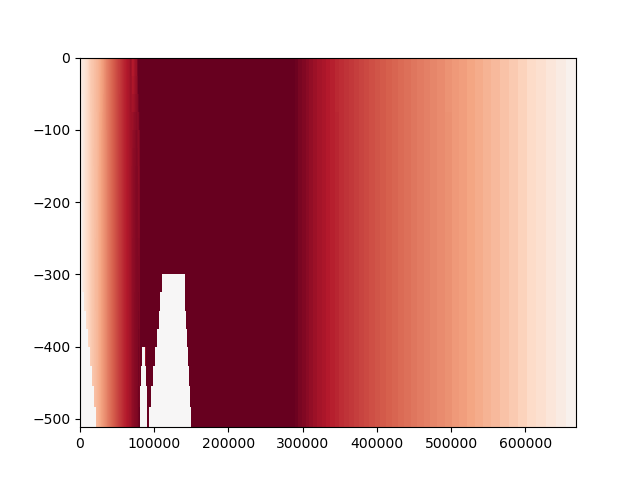

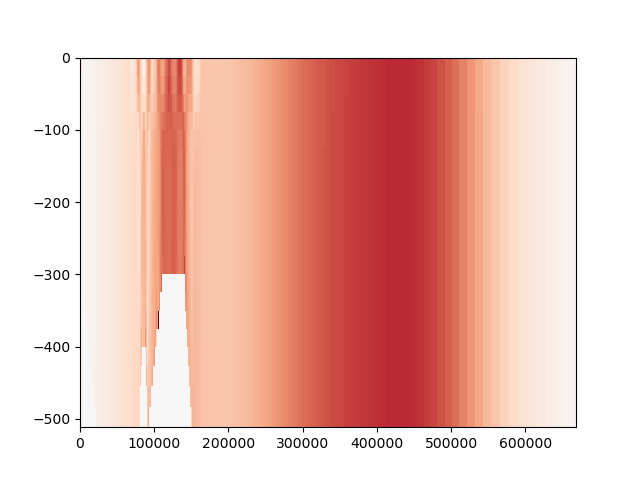

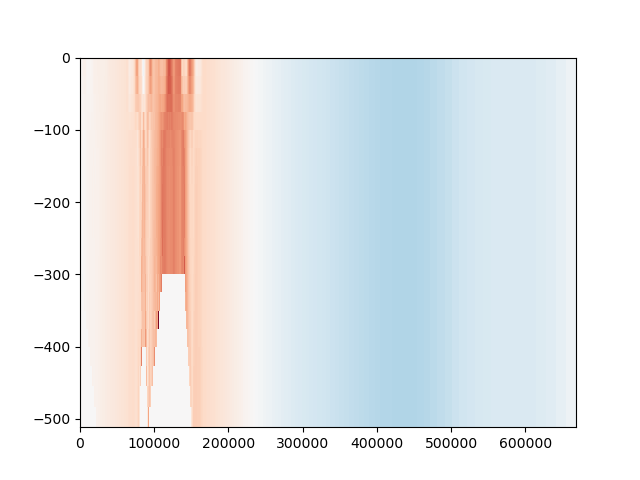

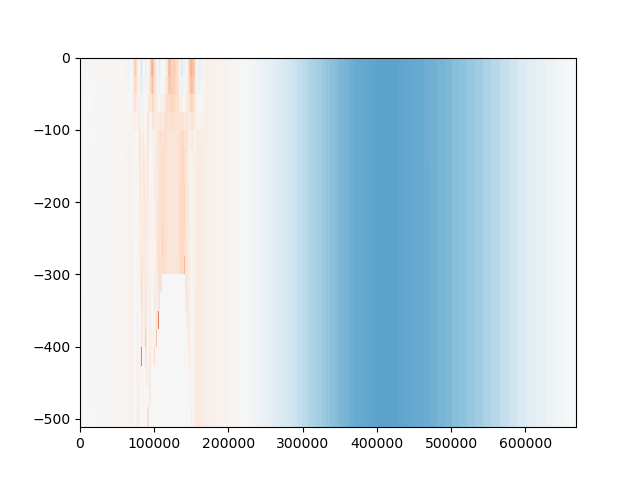

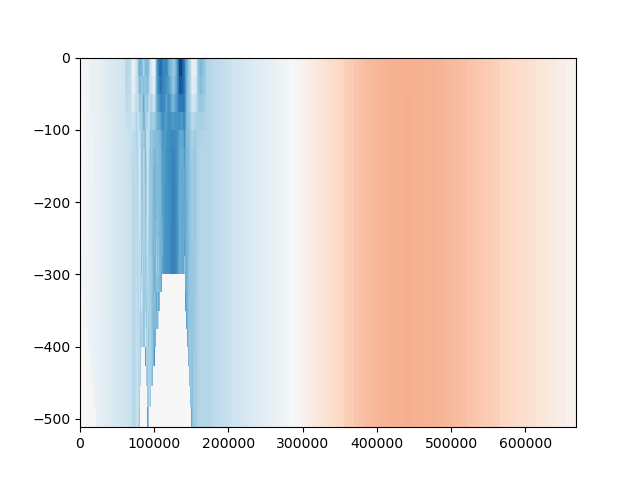

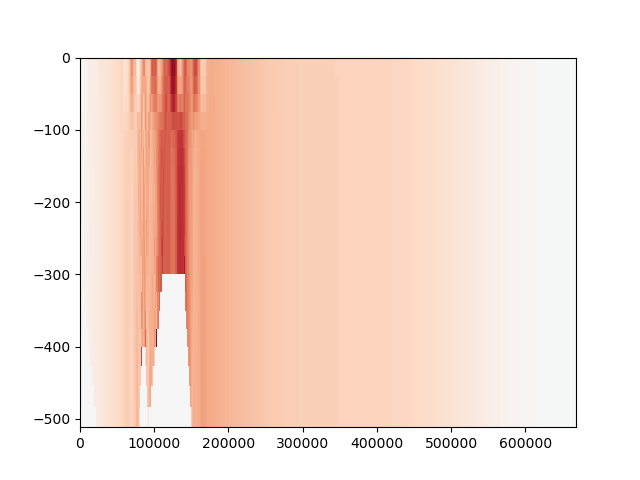

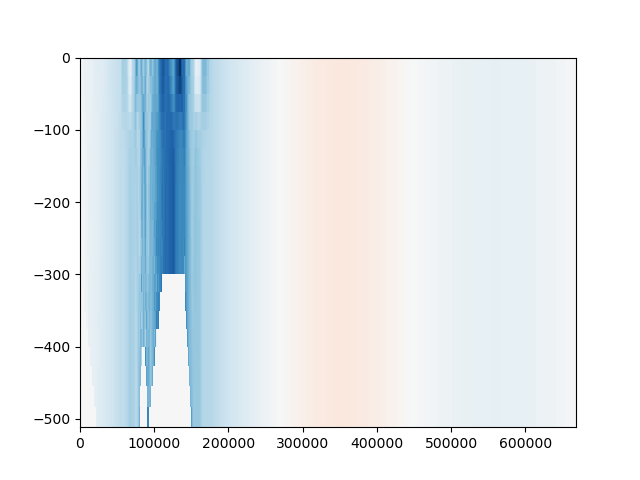

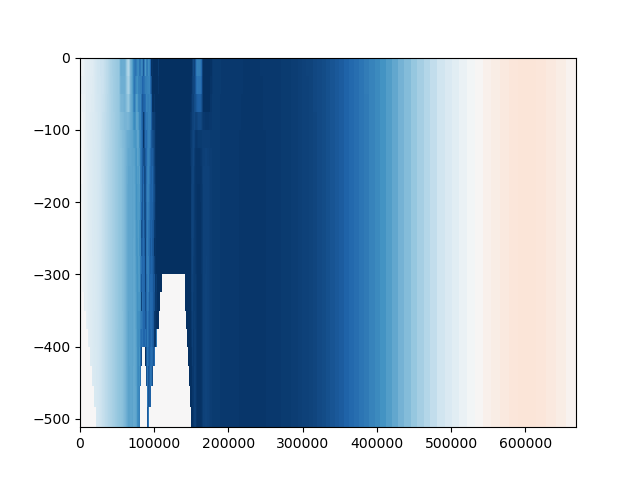

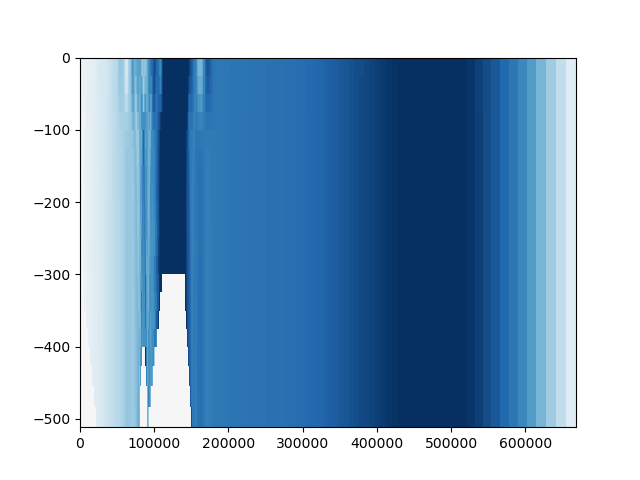

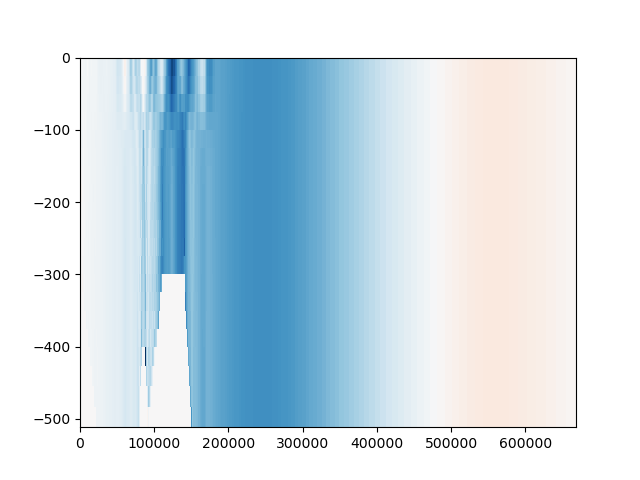

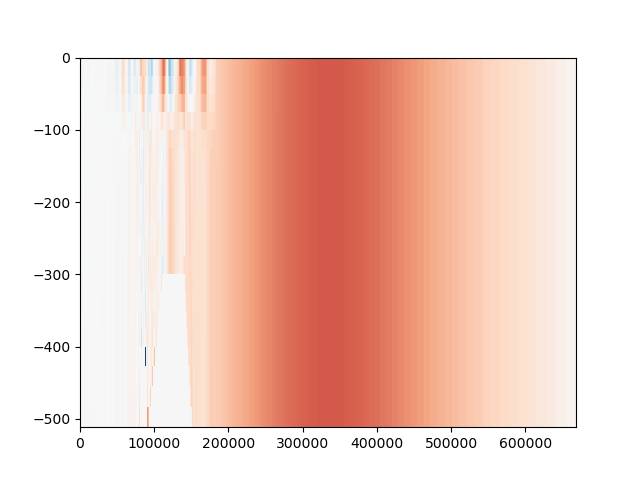

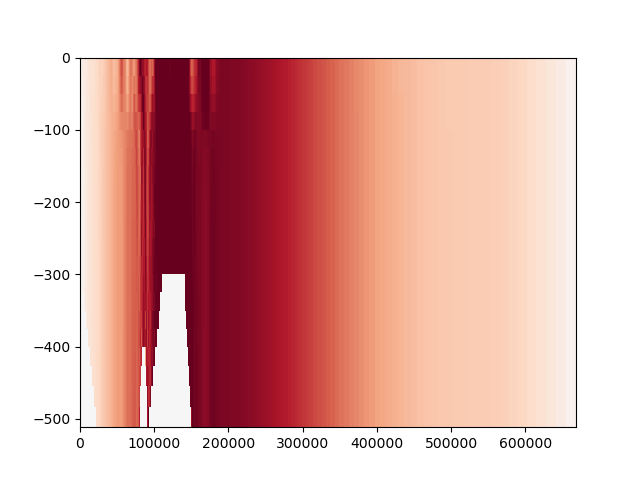

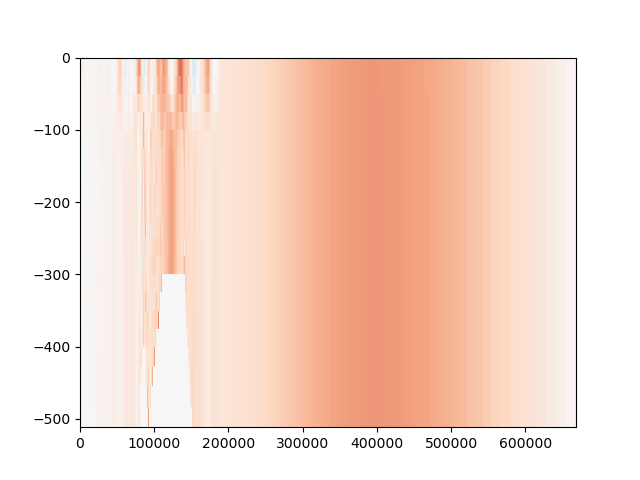

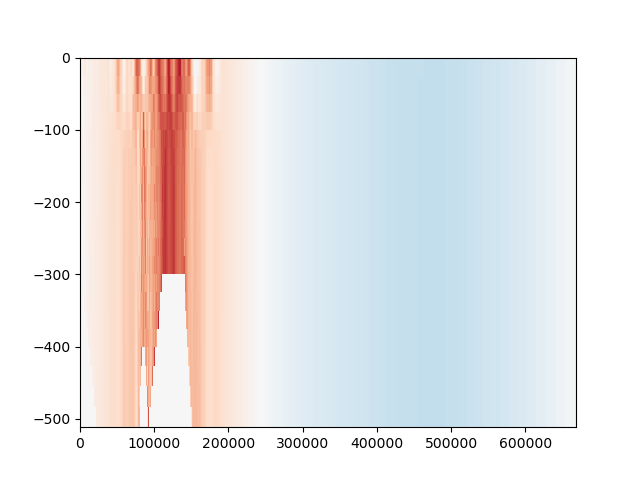

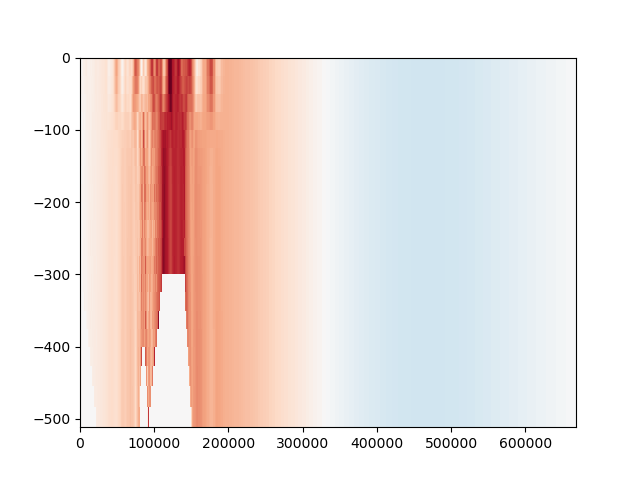

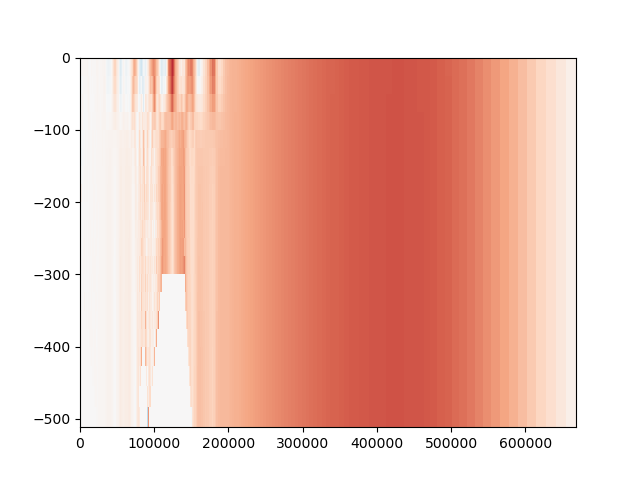

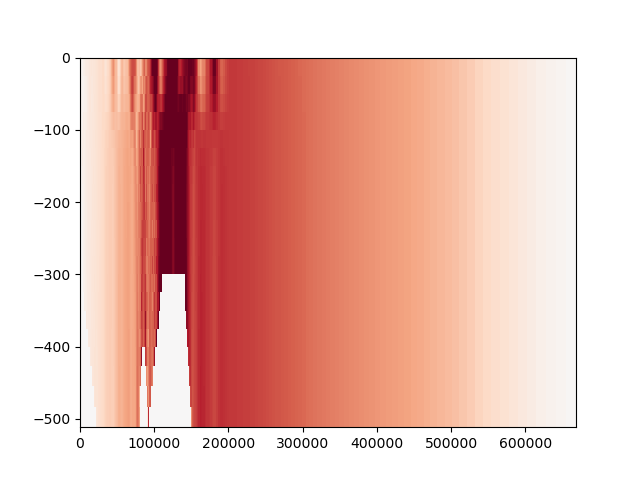

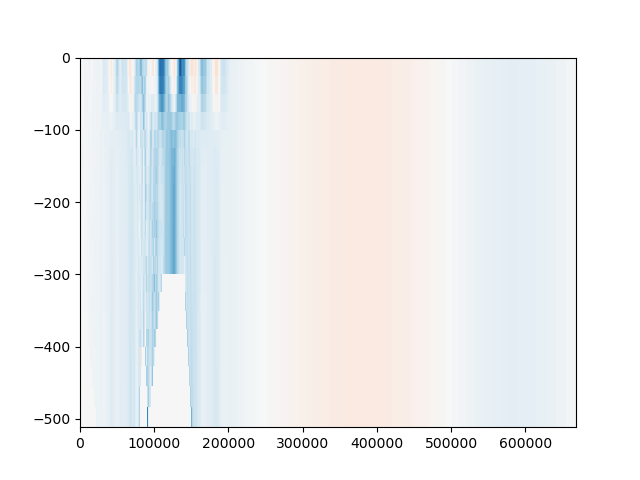

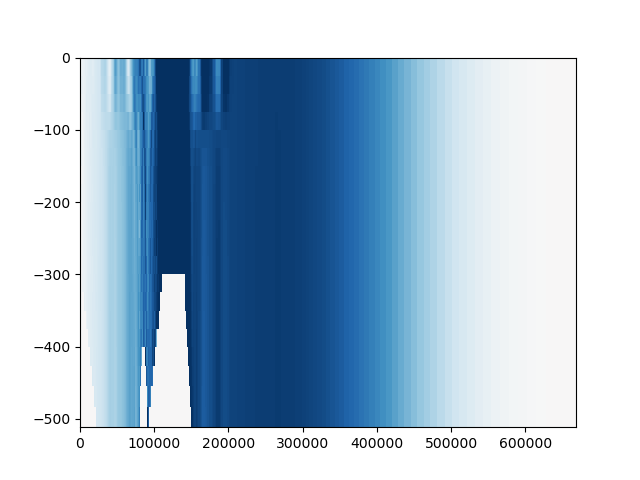

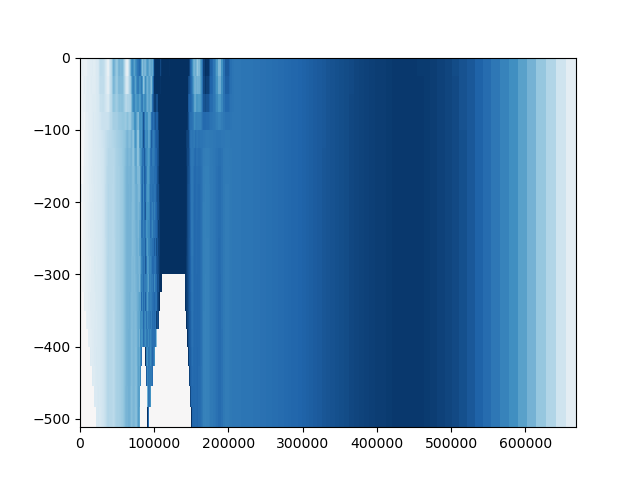

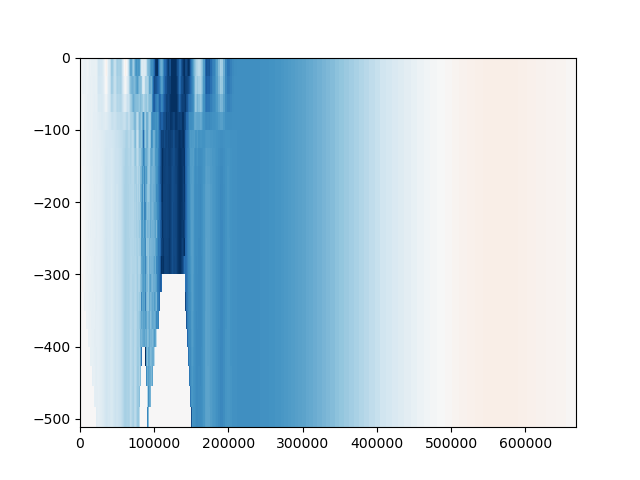

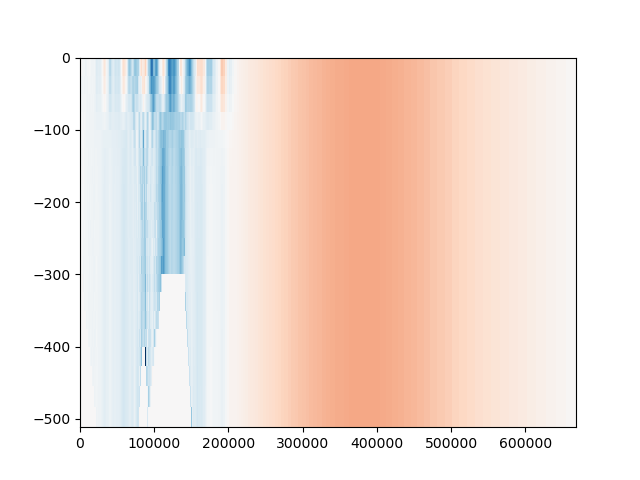

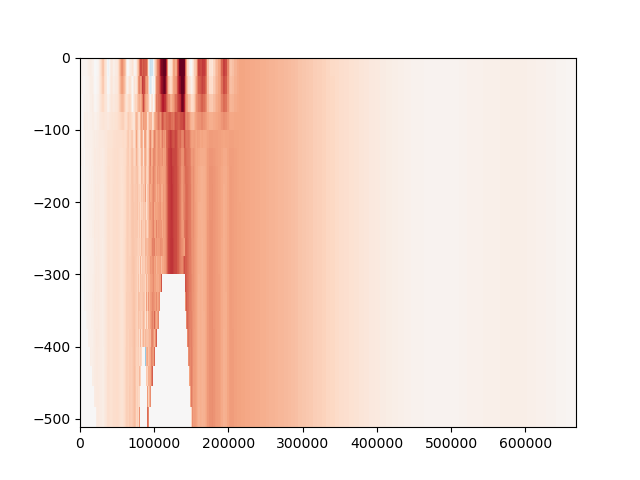

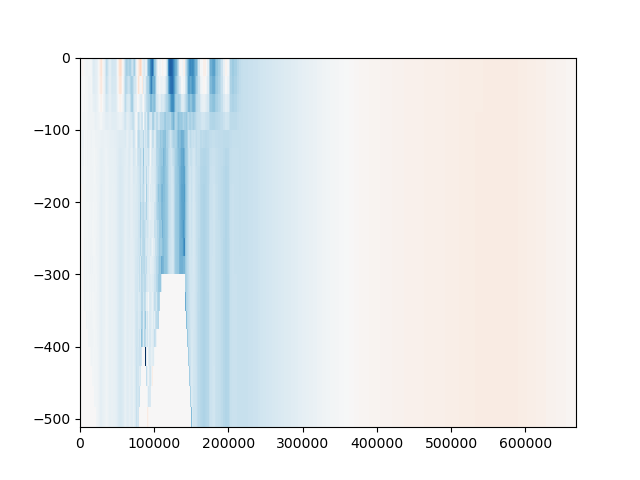

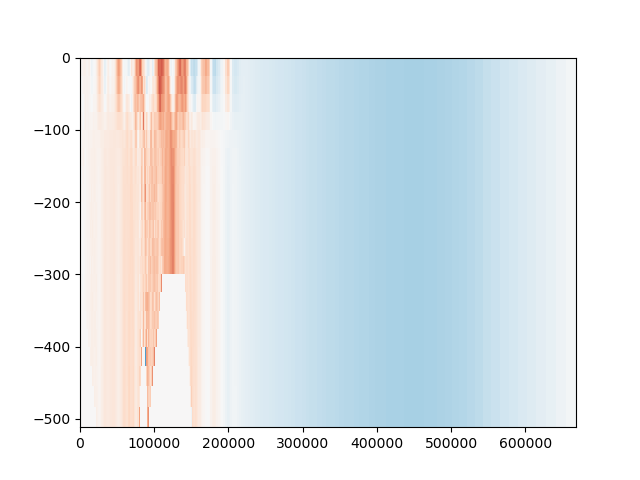

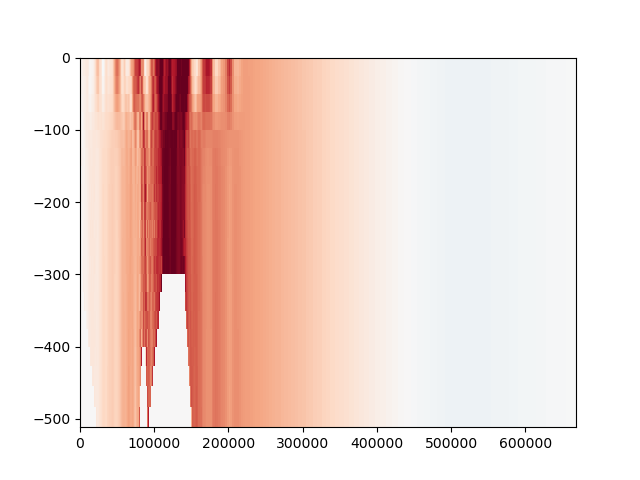

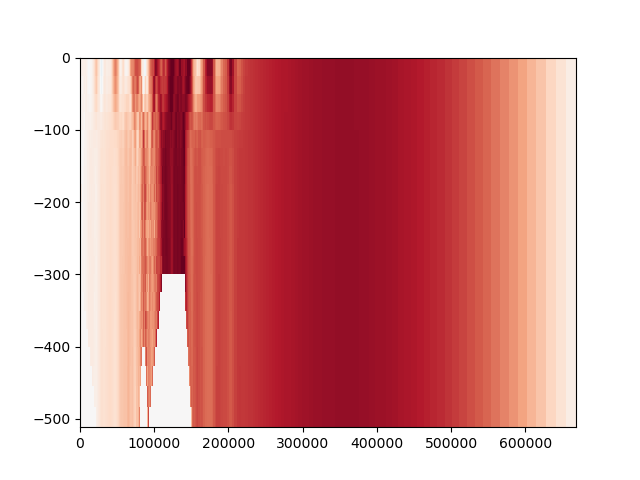

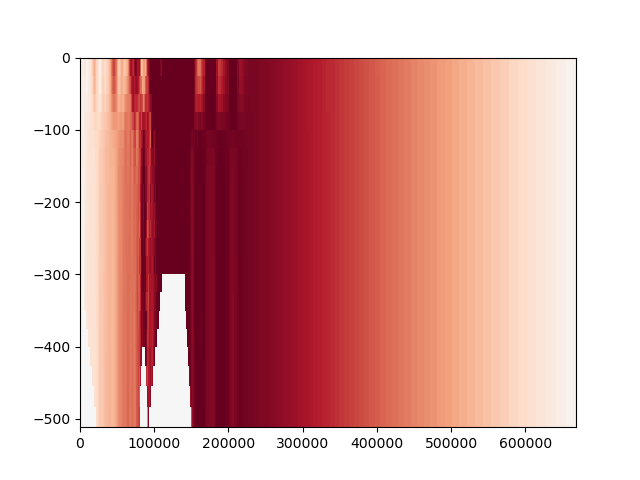

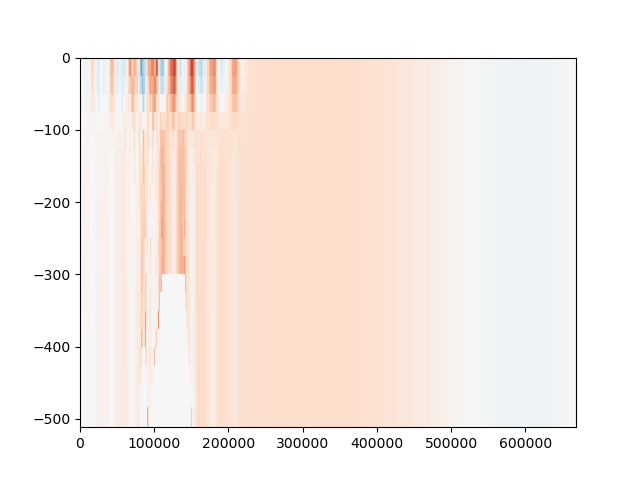

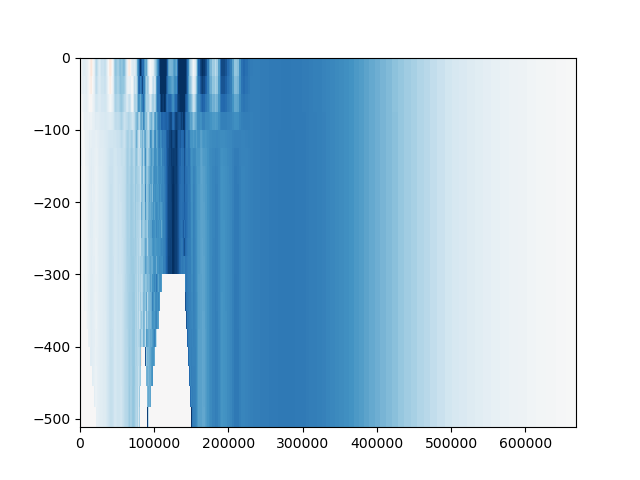

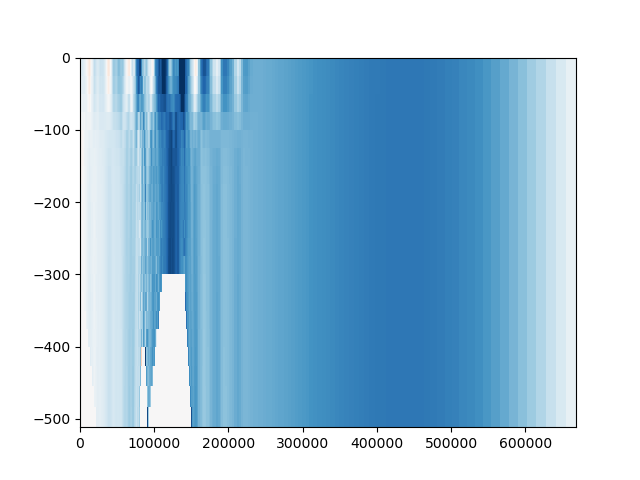

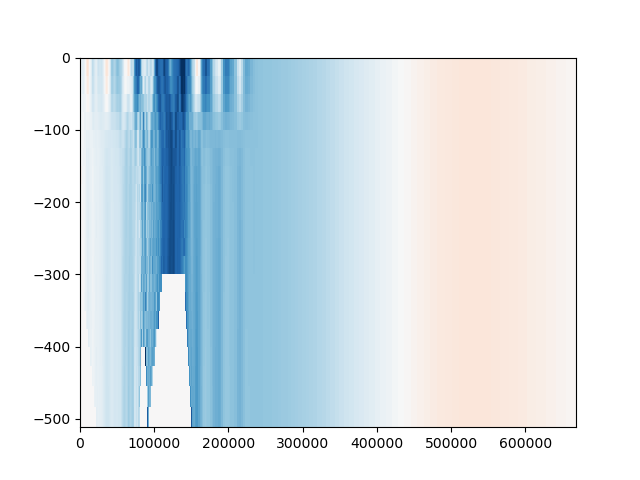

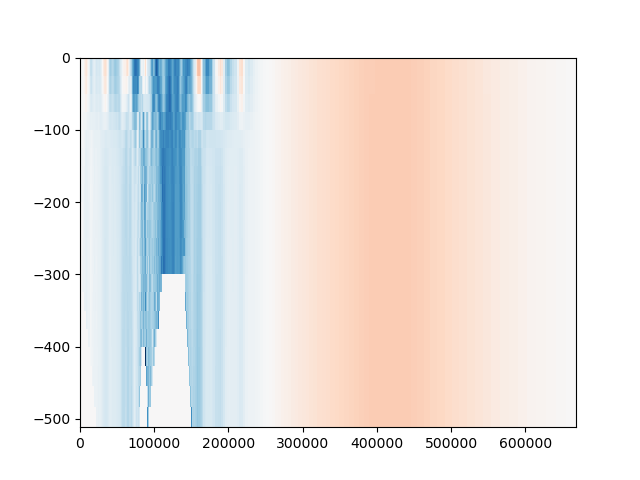

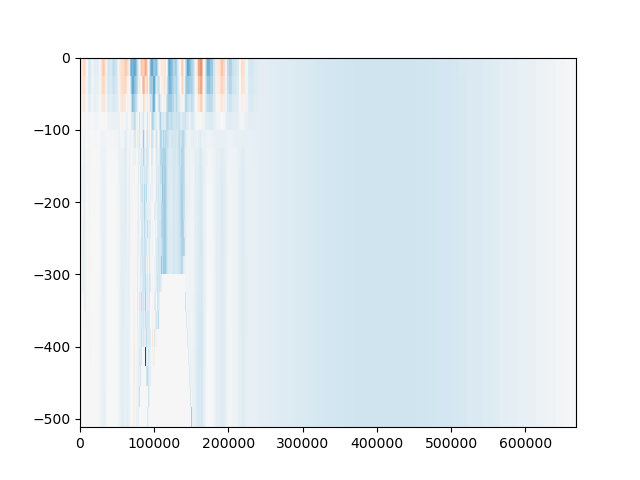

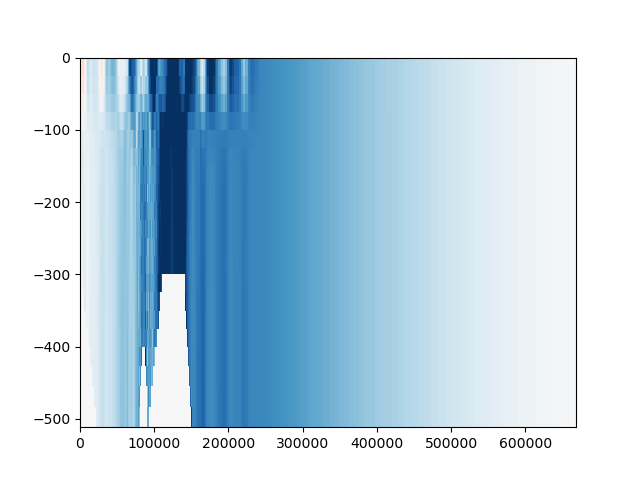

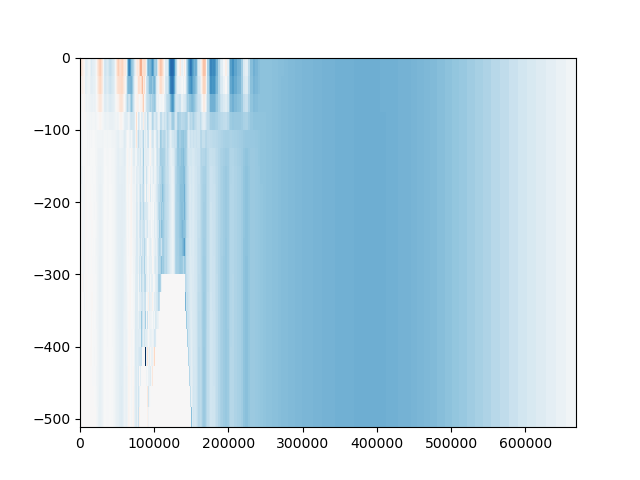

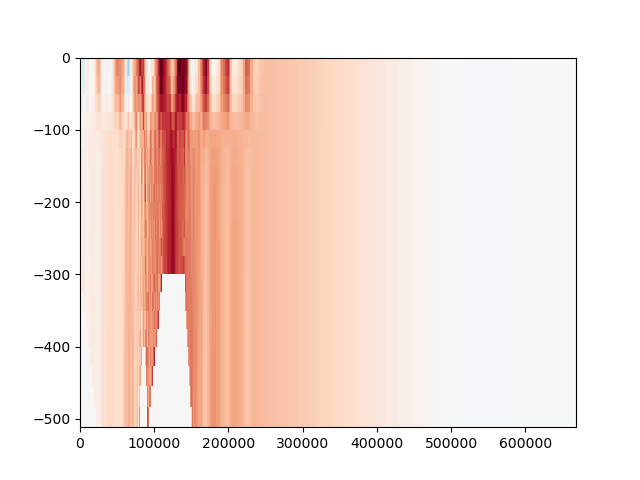

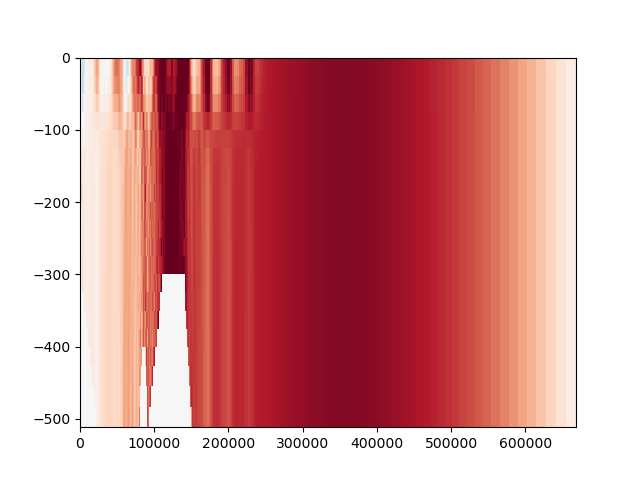

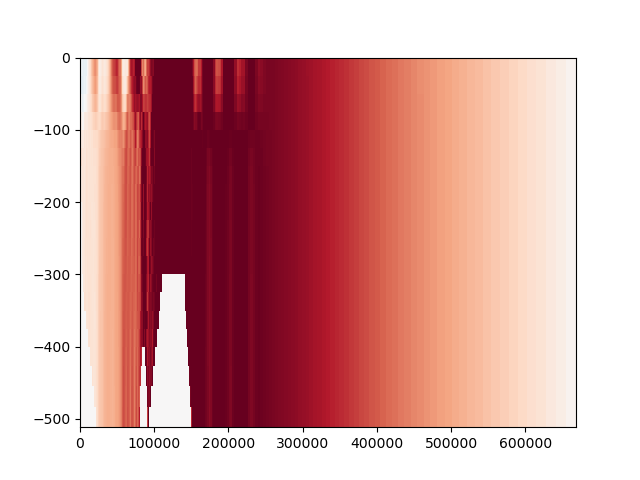

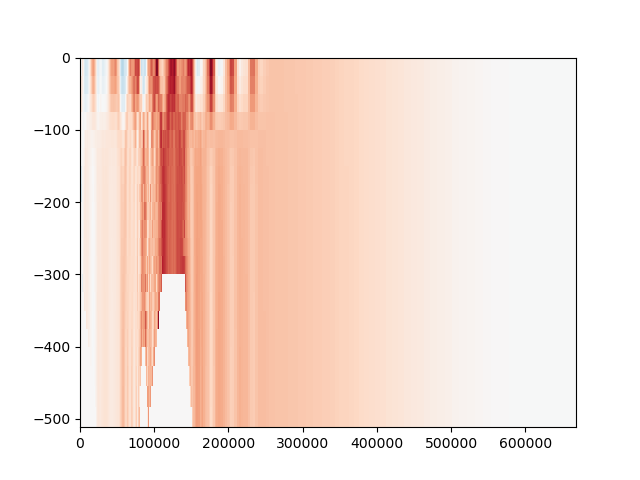

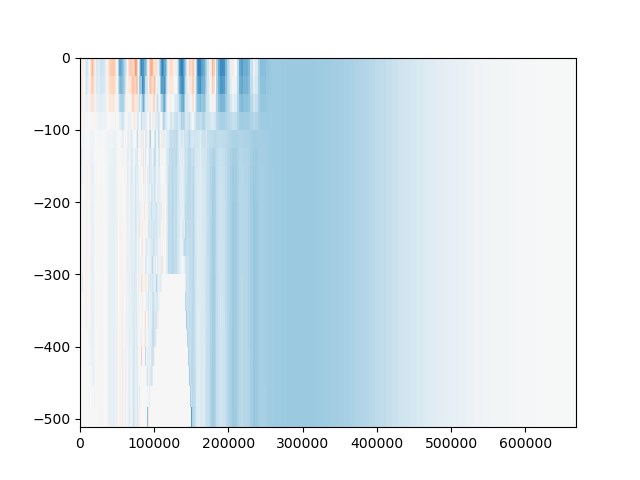

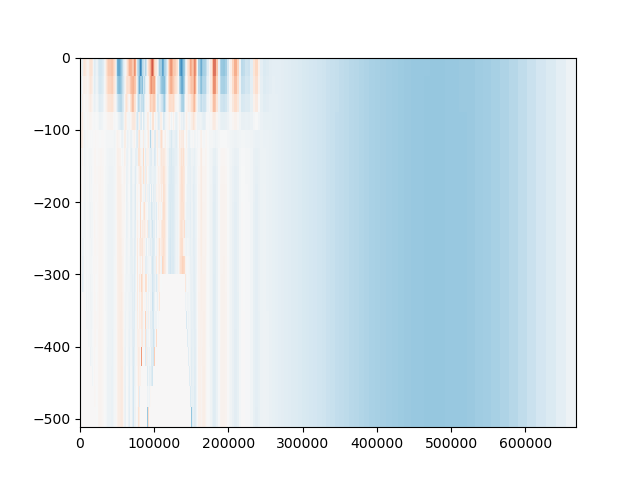

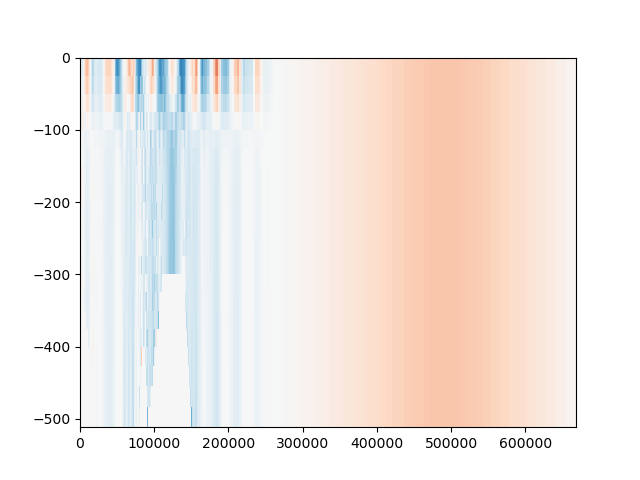

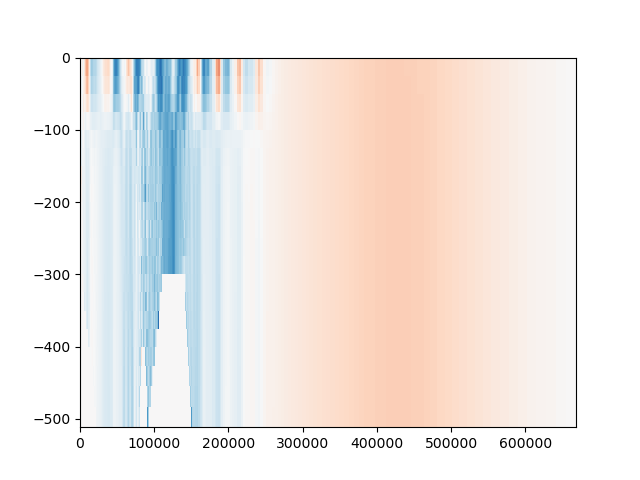

In [21]:
runname = 'Fjord2'
with xmitgcm.open_mdsdataset(f'../results/{runname}/input/',
                             endian='<', prefix=['spinup', 'spinup2d']) as ds0:
    for ind in range(50):
        fig, axs = plt.subplots()
        axs.pcolormesh(ds0.XC, ds0.Z, ds0.isel(YC=0).isel(time=ind).UVEL, vmin=-5e-2, vmax=5e-2, cmap='RdBu_r')
        
                                     

In [5]:
df = pd.read_excel('../HenriettaWeatherStationDataNov2019_Feb2020.xlsx', sheet_name="Final", header=75 )

NameError: name 'pd' is not defined

In [4]:
df['Wind']
wind = df['Wind'][1:]
df['date'] = df['Unnamed: 0'][1:]
df['time'] = df['Unnamed: 1'][1:]

df['date'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['time'].astype(str))



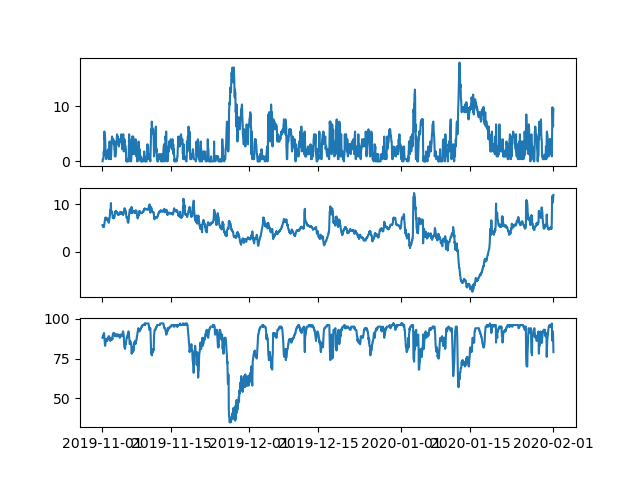

In [5]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(df['date'][1:], df['Wind'][1:])
ax[1].plot(df['date'][1:], df['Temp'][1:])
ax[2].plot(df['date'][1:], df['Out'][1:])

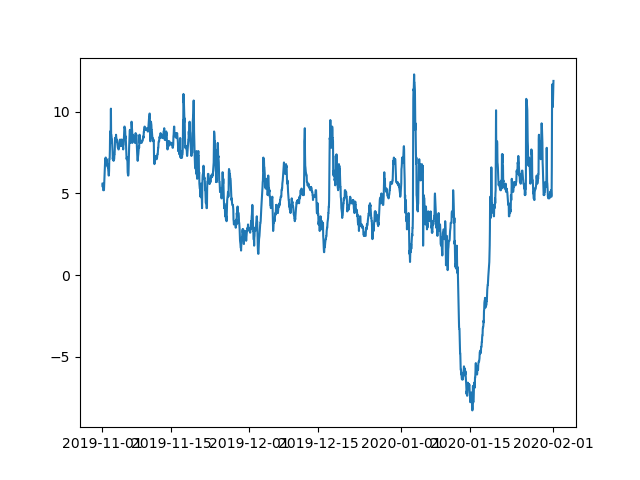

In [6]:
fig, ax = plt.subplots()
ax.plot(df['date'][1:], df['Temp'][1:])